# Data Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import os

plt.rcParams['font.family'] = 'IBM Plex Mono'

os.makedirs('Data/preprocessed', exist_ok=True)

In [2]:
df = pd.read_csv('Data/data/Dataset1.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,100.64.0.2-100.64.0.1-0-0-0,100.64.0.2,0,100.64.0.1,0,0,2023-03-19 15:02:20.266440,117265975,24,24,...,150.478261,21.023514,188.0,104.0,5.098364e+06,9600.548411,5102694.0,5058427.0,0,Benign
1,10.16.0.6-144.122.71.18-34788-6443-6,10.16.0.6,34788,144.122.71.18,6443,6,2023-03-19 15:02:22.387673,116365340,347,399,...,252225.789474,37764.416542,330282.0,182906.0,5.858473e+06,27027.010586,5900021.0,5780088.0,116365340,Benign
2,10.16.0.6-144.122.71.18-0-0-0,10.16.0.6,0,144.122.71.18,0,0,2023-03-19 15:02:22.901650,116311908,60,60,...,200688.000000,115.236954,201019.0,200516.0,5.910436e+06,35670.903124,5985028.0,5829637.0,0,Benign
3,10.16.0.6-114.114.114.114-0-0-0,10.16.0.6,0,114.114.114.114,0,0,2023-03-19 15:02:23.119110,116621944,60,60,...,165772.052632,158.023372,166361.0,165638.0,5.963502e+06,70314.041171,6206461.0,5865044.0,0,Benign
4,10.16.0.2-144.122.71.18-56026-6443-6,10.16.0.2,56026,144.122.71.18,6443,6,2023-03-19 15:02:23.109867,116511701,485,312,...,251811.055556,33439.209965,298020.0,218921.0,6.208805e+06,144952.954674,6404463.0,5914190.0,116511701,Benign


In [3]:
UNWANTED_COLS = [
    "Flow ID",
    "Timestamp",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "URG Flag Count",
    "CWR Flag Count",
    "ECE Flag Count",
    'Subflow Bwd Packets'
]
df.drop(UNWANTED_COLS, axis=1, inplace=True)
for c in df.columns:
    if df[c].dtype == 'object':
        df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
df.head()

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\2279814567.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\2279814567.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,0,0,0,0,0,117265975,24,24,0.0,0.0,...,150.478261,21.023514,188.0,104.0,5.098364e+06,9600.548411,5102694.0,5058427.0,0,0
1,1,34788,1,6443,6,116365340,347,399,10800.0,812557.0,...,252225.789474,37764.416542,330282.0,182906.0,5.858473e+06,27027.010586,5900021.0,5780088.0,116365340,0
2,1,0,1,0,0,116311908,60,60,0.0,0.0,...,200688.000000,115.236954,201019.0,200516.0,5.910436e+06,35670.903124,5985028.0,5829637.0,0,0
3,1,0,2,0,0,116621944,60,60,0.0,0.0,...,165772.052632,158.023372,166361.0,165638.0,5.963502e+06,70314.041171,6206461.0,5865044.0,0,0
4,2,56026,1,6443,6,116511701,485,312,10260.0,774404.0,...,251811.055556,33439.209965,298020.0,218921.0,6.208805e+06,144952.954674,6404463.0,5914190.0,116511701,0


In [4]:
CLASSES = [
    "Benign",
    "CVE-2020-13379",
    "Node-RED Reconnaissance",
    "Node-RED RCE",
    "Node-RED Container Escape",
    "CVE-2021-43798",
    "CVE-2019-20933",
    "CVE-2021-30465",
    "CVE-2021-25741",
    "CVE-2022-23648",
    "CVE-2019-5736",
    "DSB Nuclei Scan",
]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
df['Label'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)
mm = MinMaxScaler()
x = df.values[:, :-1]
x = mm.fit_transform(x)
y = df.values[:, -1]
df = pd.DataFrame(x, columns=df.columns[:-1])
df['Label'] = y
df.to_csv('Data/preprocessed/Dataset1.csv', index=False)

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\2934567224.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)


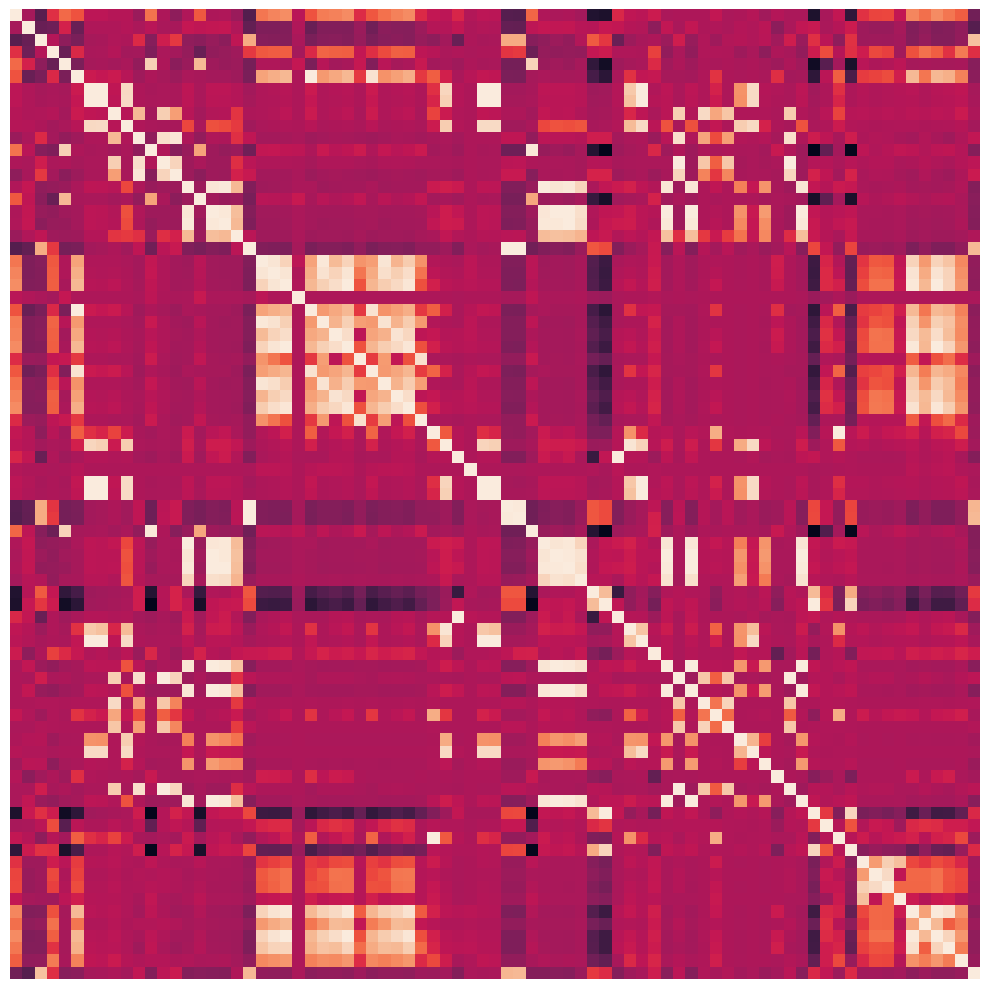

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
sbn.heatmap(df.corr(), annot=False, cbar=False, ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig('Data/preprocessed/corr1.png')

In [6]:
df = pd.read_csv('Data/data/Dataset2.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,100.64.0.2-100.64.0.1-0-0-0,100.64.0.2,0,100.64.0.1,0,0,2023-03-19 15:02:20.266440,117265975,24,24,...,150.478261,21.023514,188.0,104.0,5.098364e+06,9600.548411,5102694.0,5058427.0,0,Benign
1,10.16.0.6-144.122.71.18-34788-6443-6,10.16.0.6,34788,144.122.71.18,6443,6,2023-03-19 15:02:22.387673,116365340,347,399,...,252225.789474,37764.416542,330282.0,182906.0,5.858473e+06,27027.010586,5900021.0,5780088.0,116365340,Benign
2,10.16.0.6-144.122.71.18-0-0-0,10.16.0.6,0,144.122.71.18,0,0,2023-03-19 15:02:22.901650,116311908,60,60,...,200688.000000,115.236954,201019.0,200516.0,5.910436e+06,35670.903124,5985028.0,5829637.0,0,Benign
3,10.16.0.6-114.114.114.114-0-0-0,10.16.0.6,0,114.114.114.114,0,0,2023-03-19 15:02:23.119110,116621944,60,60,...,165772.052632,158.023372,166361.0,165638.0,5.963502e+06,70314.041171,6206461.0,5865044.0,0,Benign
4,10.16.0.2-144.122.71.18-56026-6443-6,10.16.0.2,56026,144.122.71.18,6443,6,2023-03-19 15:02:23.109867,116511701,485,312,...,251811.055556,33439.209965,298020.0,218921.0,6.208805e+06,144952.954674,6404463.0,5914190.0,116511701,Benign


In [7]:
UNWANTED_COLS = [
    "Flow ID",
    "Timestamp",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "URG Flag Count",
    "CWR Flag Count",
    "ECE Flag Count",
    "Subflow Bwd Packets",
]
df.drop(UNWANTED_COLS, axis=1, inplace=True)
for c in df.columns:
    if df[c].dtype == "object":
        df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
df.head()

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\833329586.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\833329586.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,0,0,0,0,0,117265975,24,24,0.0,0.0,...,150.478261,21.023514,188.0,104.0,5.098364e+06,9600.548411,5102694.0,5058427.0,0,0
1,1,34788,1,6443,6,116365340,347,399,10800.0,812557.0,...,252225.789474,37764.416542,330282.0,182906.0,5.858473e+06,27027.010586,5900021.0,5780088.0,116365340,0
2,1,0,1,0,0,116311908,60,60,0.0,0.0,...,200688.000000,115.236954,201019.0,200516.0,5.910436e+06,35670.903124,5985028.0,5829637.0,0,0
3,1,0,2,0,0,116621944,60,60,0.0,0.0,...,165772.052632,158.023372,166361.0,165638.0,5.963502e+06,70314.041171,6206461.0,5865044.0,0,0
4,2,56026,1,6443,6,116511701,485,312,10260.0,774404.0,...,251811.055556,33439.209965,298020.0,218921.0,6.208805e+06,144952.954674,6404463.0,5914190.0,116511701,0


In [8]:
CLASSES = [
    "Benign",
    "CVE-2020-13379",
    "Node-RED Reconnaissance",
    "Node-RED RCE",
    "Node-RED Container Escape",
    "CVE-2021-43798",
    "CVE-2019-20933",
    "CVE-2021-30465",
    "CVE-2021-25741",
    "CVE-2022-23648",
    "CVE-2019-5736",
    "DSB Nuclei Scan",
]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
df['Label'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)
mm = MinMaxScaler()
x = df.values[:, :-1]
x = mm.fit_transform(x)
y = df.values[:, -1]
df = pd.DataFrame(x, columns=df.columns[:-1])
df['Label'] = y
df.to_csv('Data/preprocessed/Dataset2.csv', index=False)

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\1269004175.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)


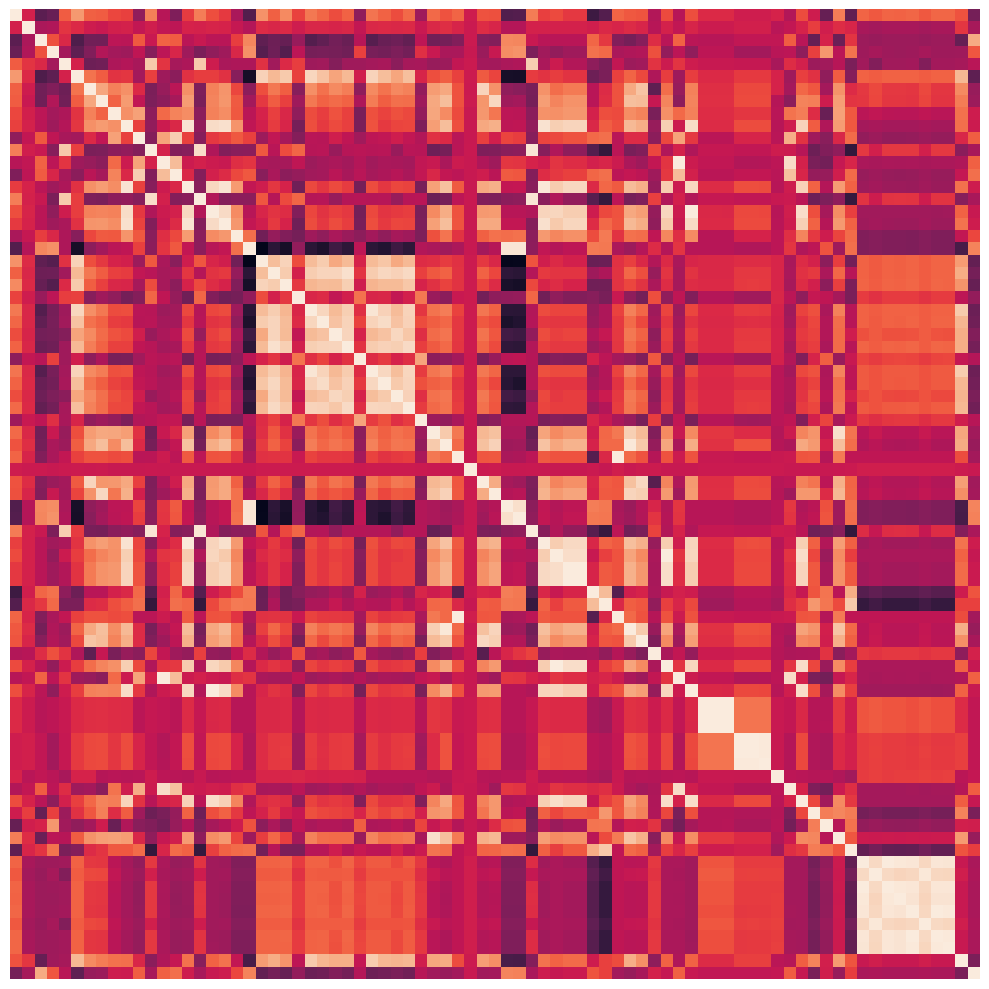

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
sbn.heatmap(df.corr(method='kendall'), annot=False, cbar=False, ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig('Data/preprocessed/corr2.png')

In [10]:
df = pd.read_csv('Data/source/Dataset3.csv')
df.head()

,Unnamed: 0,timestamp,processorId,processId,threadId,parentProcessId,hostProcessId,hostThreadId,hostParentProcessId,userId,...,processName,hostName,containerId,eventId,eventName,argsNum,returnValue,stackAddresses,class,args
0,0,29:07.8,1,1114,1114,1097,1114,1114,1097,1000,...,panel-16-pulsea,kali,NaN,3,close,1,0,NaN,Normal,"[{'name': 'fd', 'type': 'int', 'value': 14}]"
1,1,29:07.8,1,1101,1101,938,1101,1101,938,1000,...,Thunar,kali,NaN,21,access,2,0,NaN,Normal,"[{'name': 'pathname', 'type': 'const char*', '..."
2,2,29:07.8,1,1101,1101,938,1101,1101,938,1000,...,Thunar,kali,NaN,257,openat,4,-2,NaN,Normal,"[{'name': 'dirfd', 'type': 'int', 'value': -10..."
3,3,29:07.8,1,1101,1101,938,1101,1101,938,1000,...,Thunar,kali,NaN,21,access,2,0,NaN,Normal,"[{'name': 'pathname', 'type': 'const char*', '..."
4,4,29:07.8,1,1101,1101,938,1101,1101,938,1000,...,Thunar,kali,NaN,1007,cap_capable,1,0,NaN,Normal,"[{'name': 'cap', 'type': 'int', 'value': 1}]"


In [11]:
UNWANTED_COLS = [
    "Unnamed: 0",
    "timestamp",
    'stackAddresses',
    "args",
]
df.drop(UNWANTED_COLS, axis=1, inplace=True)
for c in df.columns:
    if df[c].dtype == 'object':
        df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
df.head()

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\534357450.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace({k: v for v, k in enumerate(df[c].unique())}, inplace=True)
C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\534357450.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

,processorId,processId,threadId,parentProcessId,hostProcessId,hostThreadId,hostParentProcessId,userId,mountNamespace,pidNamespace,processName,hostName,containerId,eventId,eventName,argsNum,returnValue,class
0,1,1114,1114,1097,1114,1114,1097,1000,4026531840,4026531836,0,0,0,3,0,1,0,0
1,1,1101,1101,938,1101,1101,938,1000,4026531840,4026531836,1,0,0,21,1,2,0,0
2,1,1101,1101,938,1101,1101,938,1000,4026531840,4026531836,1,0,0,257,2,4,-2,0
3,1,1101,1101,938,1101,1101,938,1000,4026531840,4026531836,1,0,0,21,1,2,0,0
4,1,1101,1101,938,1101,1101,938,1000,4026531840,4026531836,1,0,0,1007,3,1,0,0


In [12]:
CLASSES = [
    "Normal",
    "Attack",
]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
df['class'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)
mm = MinMaxScaler()
x = df.values[:, :-1]
x = mm.fit_transform(x)
y = df.values[:, -1]
df = pd.DataFrame(x, columns=df.columns[:-1])
df['Label'] = y
df.to_csv('Data/preprocessed/Dataset3.csv', index=False)

C:\Users\ravik\AppData\Local\Temp\ipykernel_4580\2783420893.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['class'].replace({v: k for k, v in enumerate(CLASSES)}, inplace=True)


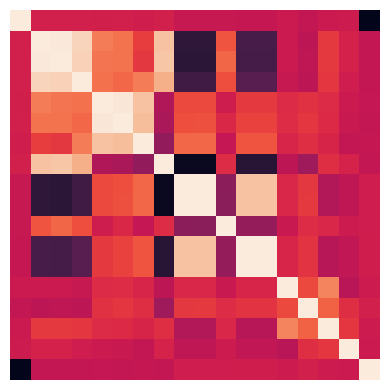

In [13]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca()
sbn.heatmap(df.corr(), annot=False, cbar=False, ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig('Data/preprocessed/corr3.png')